In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from clean_tweets_dataframe import CleanTweets
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import warnings
import string
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df_tweet=pd.read_csv("processed_tweet_data.csv")

In [4]:
cleaner=CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [5]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)
df_tweet=cleaner.drop_duplicate(df_tweet)
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)
df_tweet=cleaner.remove_non_english_tweets(df_tweet)

In [6]:
# df_tweet.head()

In [7]:
# df_tweet.info()

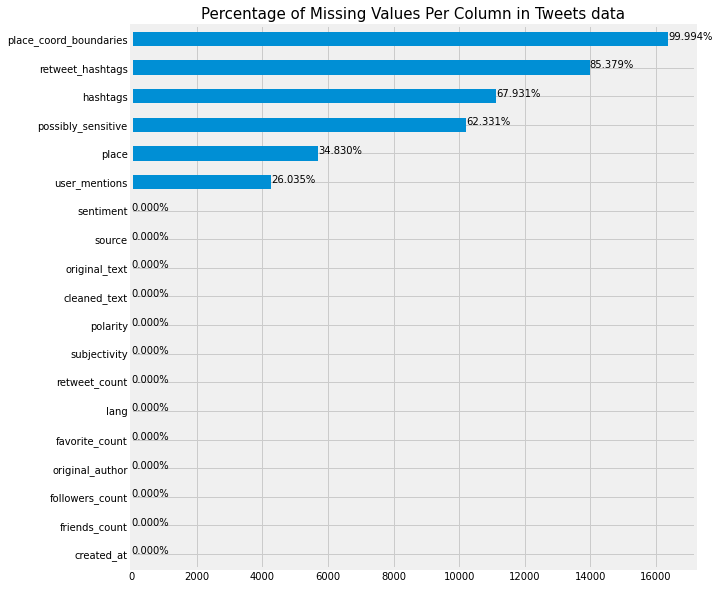

In [8]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [9]:
df_tweet.columns

Index(['created_at', 'source', 'original_text', 'cleaned_text', 'polarity',
       'subjectivity', 'sentiment', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'retweet_hashtags', 'user_mentions',
       'place', 'place_coord_boundaries'],
      dtype='object')

### uni-variate Analysis on Hashtags


In [10]:
hashtag_df=df_tweet[['original_text','hashtags','retweet_hashtags']]

In [11]:
def find_hashtags(df_tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df_tweet)

hashtag_df['hashtag_check']=df_tweet.original_text.apply(find_hashtags)

In [12]:
hashtag_df.shape

(16374, 4)

In [15]:
hashtag_df.dropna(subset=['hashtags','retweet_hashtags','hashtag_check'],inplace=True)

In [16]:
hashtag_df.shape

(2384, 4)

In [17]:
tags_list=list(hashtag_df['hashtag_check'])

In [18]:
hashtags_list_df = pd.DataFrame([tag for tags_row in tags_list for tag in tags_row],columns=['hashtag'])

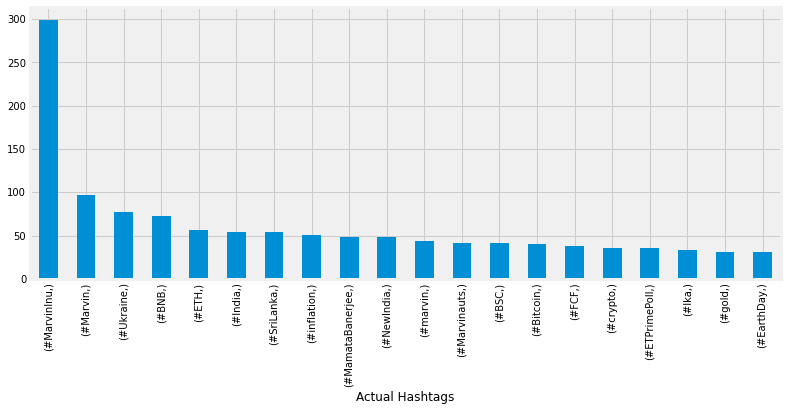

In [19]:
_=hashtags_list_df.value_counts()[:20].plot(kind='bar',figsize=(12,5),xlabel='Actual Hashtags')

In [20]:
#Convert hastags to lowercase
hashtags_list_df['hashtag'] = hashtags_list_df['hashtag'].str.lower()

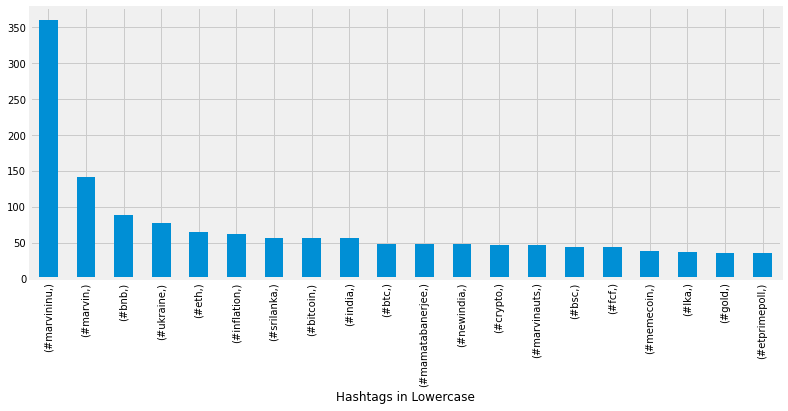

In [21]:
_=hashtags_list_df.value_counts()[:20].plot(kind='bar',figsize=(12,5),xlabel='Hashtags in Lowercase')

In [22]:
user_summary=df_tweet.groupby('original_author').agg({'cleaned_text':'count','followers_count':'max',
                                         'polarity':'mean','subjectivity':'mean', 'sentiment':pd.Series.mode})

In [23]:
user_summary.sort_values(by='cleaned_text',ascending=False)

,cleaned_text,followers_count,polarity,subjectivity,sentiment
original_author,,,,,
zaizaiUmar,50,761,0.112110,0.293913,Positive
ray_hessel,50,11231,0.074507,0.382108,Positive
MrS0ndheim,50,60,0.090435,0.366150,Positive
Moon50097307,50,1048,0.243333,0.330460,Positive
annabellas69,50,1953,0.327458,0.512167,Positive
...,...,...,...,...,...
TNNavbharat,1,58893,0.000000,0.000000,Neutral
eliceami,1,308,1.000000,1.000000,Positive
VizhuthugalM,1,227,0.406566,0.595960,Positive


Sentiment summary of the tweets

In [24]:
text_grouped = df_tweet.groupby('sentiment').count()['cleaned_text'].reset_index()

In [25]:
text_grouped

,sentiment,cleaned_text
0,Negative,2671
1,Neutral,7423
2,Positive,6280


<AxesSubplot:xlabel='sentiment', ylabel='count'>

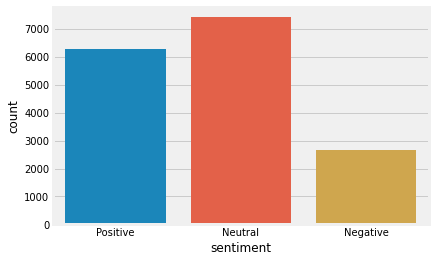

In [26]:
sns.countplot(x='sentiment', data=df_tweet)

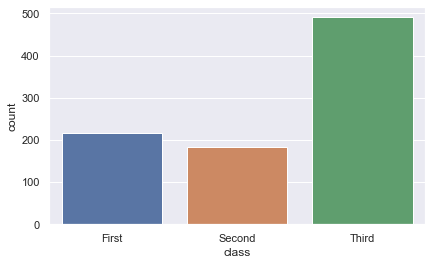

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", data=titanic)

**Most frequent words in our tweets dataset**

In [28]:
english_tweets=df_tweet[['cleaned_text']][df_tweet['lang']=='en']

In [29]:
# text Preprocessing
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].str.lower()
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].apply(
    lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [30]:
all_words=' '.join(english_tweets.cleaned_text.values)
wordcloud_obj=WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(all_words)

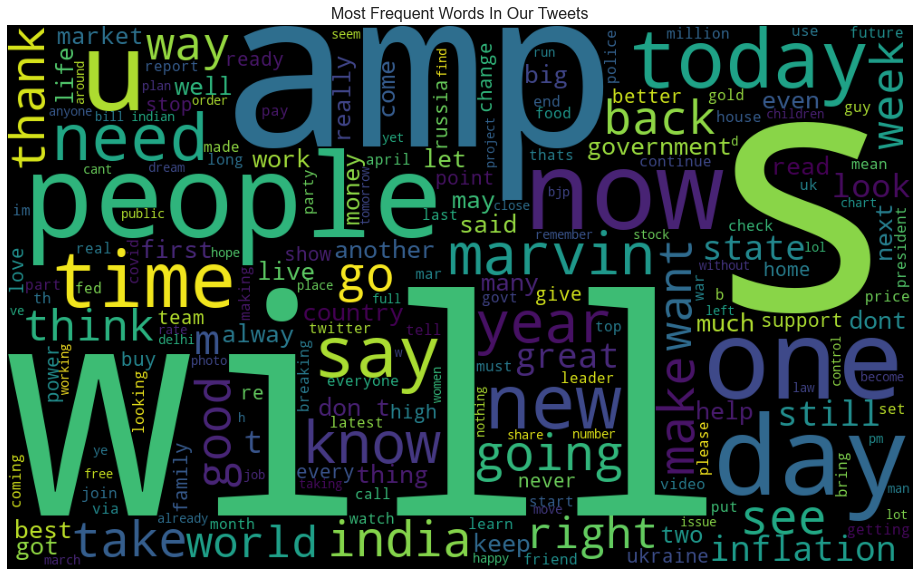

In [31]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_obj)
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()